In [1]:
base_dir = "plant_disease_dataset"
train_dir = f"{base_dir}/train"
val_dir = f"{base_dir}/validation"
test_dir = f"{base_dir}/test"

In [2]:
from tensorflow.keras.preprocessing import image_dataset_from_directory
image_size=(128,128)
batch_size=32
train_ds = image_dataset_from_directory(
    train_dir,
    image_size=image_size,
    batch_size=batch_size,
)
val_ds = image_dataset_from_directory(
    val_dir,
    image_size=image_size,
    batch_size=batch_size,
)
test_ds = image_dataset_from_directory(
    test_dir,
    image_size=image_size,
    batch_size=batch_size,
)

Found 16504 files belonging to 15 classes.
Found 2070 files belonging to 15 classes.
Found 2064 files belonging to 15 classes.


In [3]:
class_names = train_ds.class_names
print(class_names)

['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Target_Spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_mosaic_virus', 'Tomato_healthy']


In [4]:
import tensorflow as tf
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.prefetch(buffer_size=AUTOTUNE)

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Input, Dense

model = Sequential([
    Input(shape=(128,128,3)),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(len(class_names),activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [6]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    patience=1,
    verbose=1,
    monitor='val_accuracy',
    restore_best_weights=True
)
history = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=20,
    callbacks=[early_stopping]
)

Epoch 1/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 93s 179ms/step - accuracy: 0.2809 - loss: 9.6939 - val_accuracy: 0.5906 - val_loss: 1.2748
Epoch 2/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 98s 190ms/step - accuracy: 0.6374 - loss: 1.1401 - val_accuracy: 0.7311 - val_loss: 0.8402
Epoch 3/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 99s 192ms/step - accuracy: 0.7900 - loss: 0.6399 - val_accuracy: 0.7694 - val_loss: 0.7389
Epoch 4/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 101s 196ms/step - accuracy: 0.8647 - loss: 0.4031 - val_accuracy: 0.7641 - val_loss: 0.8163
Epoch 4: early stopping
Restoring model weights from the end of the best epoch: 3.


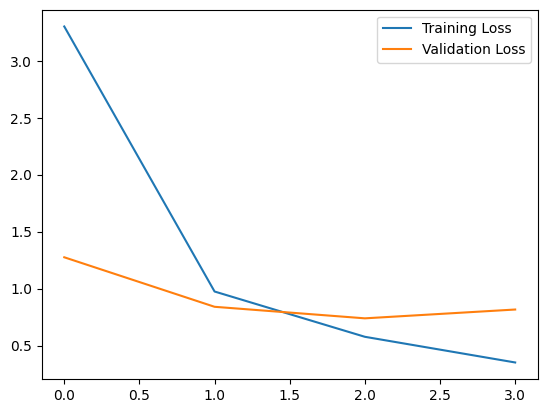

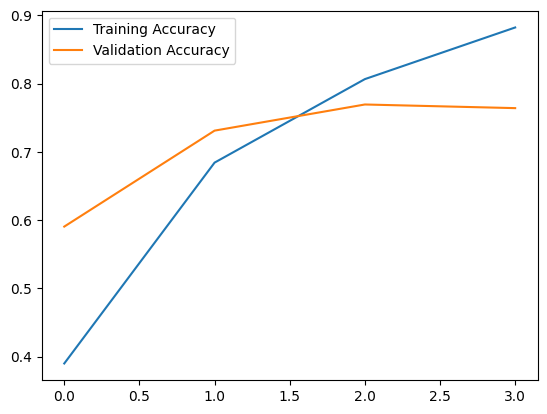

In [7]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'],label='Training Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.legend()
plt.show()

In [8]:
import numpy as np
y_pred = model.predict(val_ds)
y_pred = np.argmax(y_pred,axis=1)

65/65 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


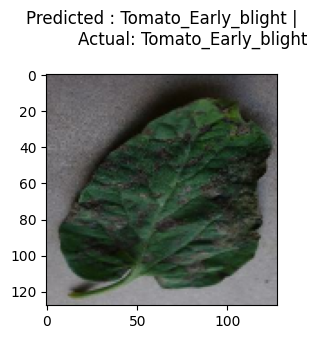

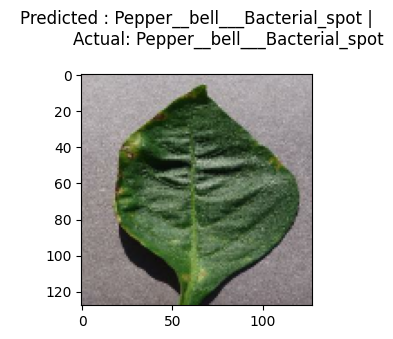

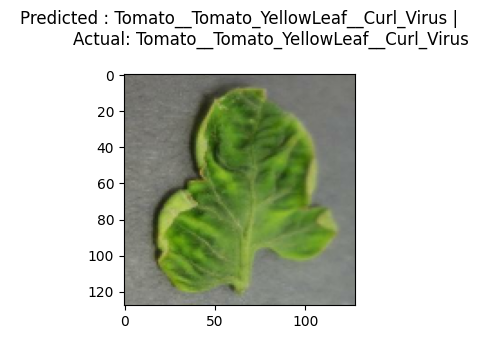

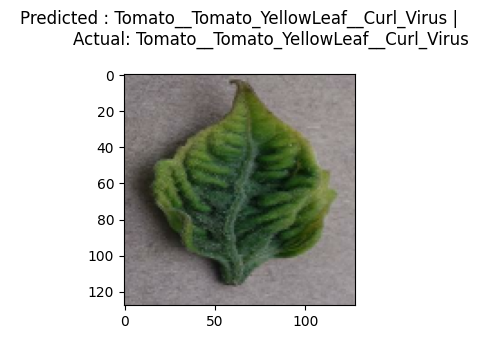

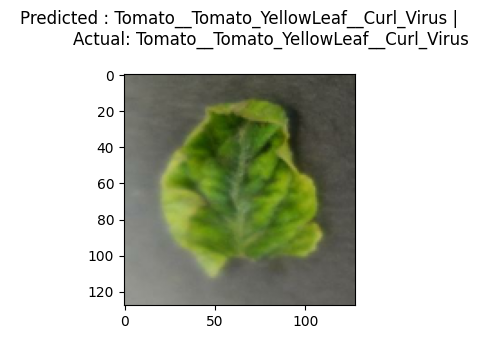

2025-04-25 10:01:52.514478: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [9]:
for images, labels in test_ds.take(1):
    preds = model.predict(images)
    predicted_classes = np.argmax(preds,axis=1)

    for i in range(5):
        plt.figure(figsize=(3,3))
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(
            f"""Predicted : {class_names[ predicted_classes[i] ]} |
            Actual: {class_names[labels[i]]}
            """
        )
        plt.show()

In [10]:
y_test=[]
y_pred=[]
for images, labels in val_ds:
    preds = model.predict(images)
    preds = np.argmax(preds,axis=1)
    y_test.extend(labels.numpy())
    y_pred.extend(preds)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━

2025-04-25 10:01:57.355437: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [11]:
from sklearn.metrics import classification_report as cr
print(cr(y_test,y_pred,target_names=class_names))

                                             precision    recall  f1-score   support

              Pepper__bell___Bacterial_spot       0.72      0.61      0.66       100
                     Pepper__bell___healthy       0.83      0.86      0.85       148
                      Potato___Early_blight       0.75      0.88      0.81       100
                       Potato___Late_blight       0.76      0.59      0.66       100
                           Potato___healthy       0.71      0.31      0.43        16
                      Tomato_Bacterial_spot       0.90      0.81      0.85       213
                        Tomato_Early_blight       0.49      0.33      0.40       100
                         Tomato_Late_blight       0.70      0.62      0.66       191
                           Tomato_Leaf_Mold       0.73      0.75      0.74        96
                  Tomato_Septoria_leaf_spot       0.50      0.69      0.58       178
Tomato_Spider_mites_Two_spotted_spider_mite       0.81      0.71

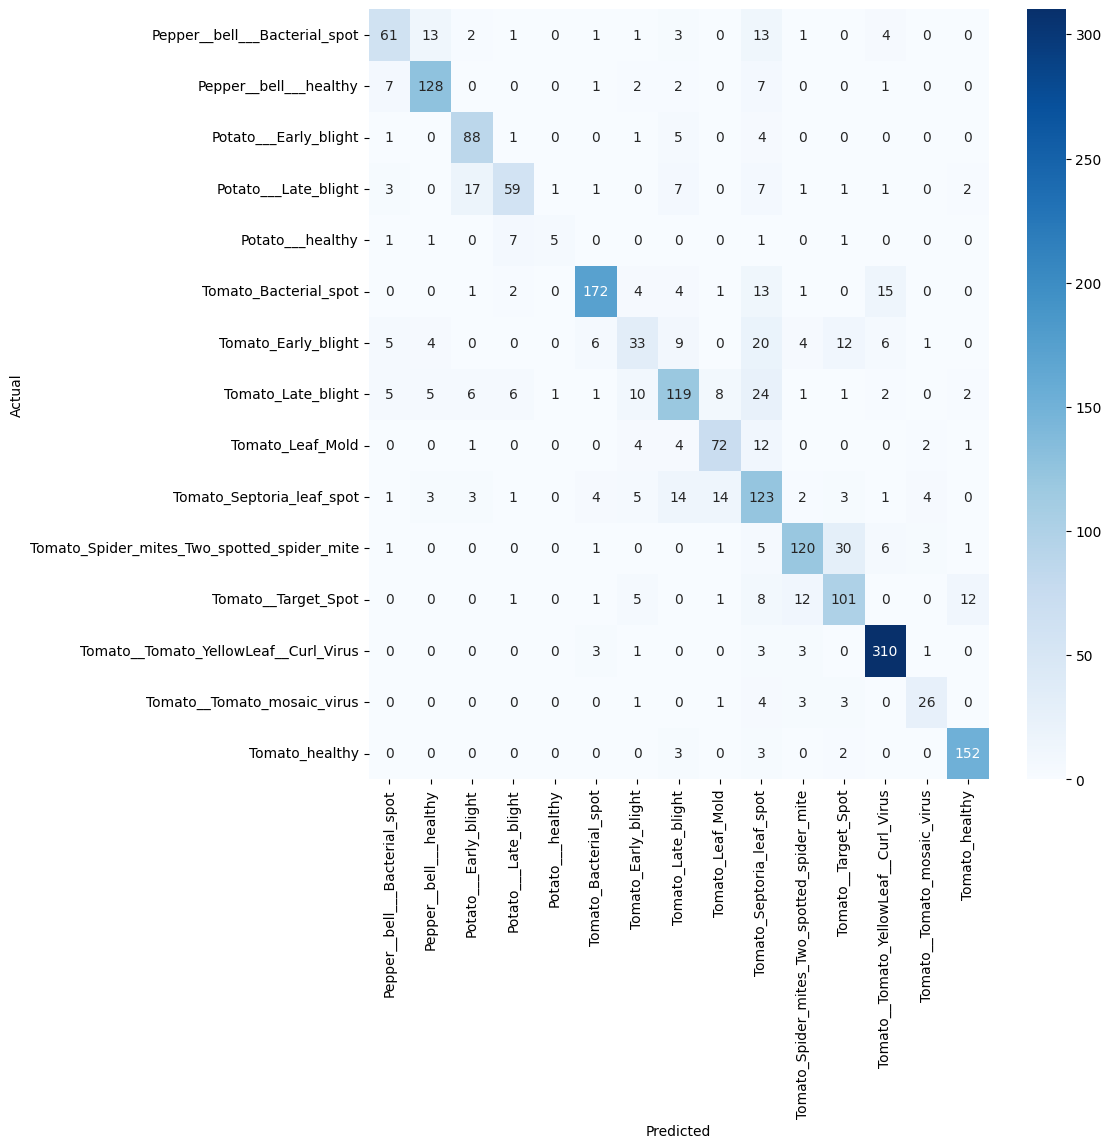

In [12]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',xticklabels=class_names,yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()